## Example of anom_detect Usage

Below I use an example from the commonly used sunspots dataset to show some features of the anomaly detection library, especially some of the plotting functionalities.

If you want to run the example, download the data set from the below commented link and then run the example.

In [1]:
from anom_detect import anom_detect
import pandas as pd
%matplotlib inline

### Load data set into Pandas

In [2]:
#!wget -c http://www-personal.umich.edu/~mejn/cp/data/sunspots.txt -P .

In [3]:
df = pd.DataFrame.from_csv('sunspots.txt',sep='\t',header=None)
df.index.name = 'time'
df.columns = ['sunspots']

/usr/local/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


In [4]:
df.head()

,sunspots
time,
0,58.0
1,62.6
2,70.0
3,55.7
4,85.0


### Evaluate for Anomalies

There are a number of options available in the anom_detect method.  It is recommended a small description below helps to:
- method : This is the data filtering method used, for the moment only 'average' is avaiable representing the moving average method.  In the future more data modelling techniques will be implemented.
- max_outliers : This is defaulted to 'None', which means that the max number of outliers is set to the size of your data set.  For more efficient computation this should be limited.
- window : The window size for the moving average, defaulted to 5.
- alpha : the significance level used for ESD test.
- mode : Method used in discrete linear convolution for dealing with boudaries.  Please read seperate documentation.  Default is 'same', this means that the window of averaging must intersect with data points with a length of >len(window)/2

In [5]:
# Use default values
an = anom_detect()

In [6]:
# Find the anomalies and print them
an.evaluate(df)

,sunspots
time,
10,158.6
42,78.4
239,111.8
253,142.5
255,51.0
262,132.2
264,36.0
268,152.7
270,67.7


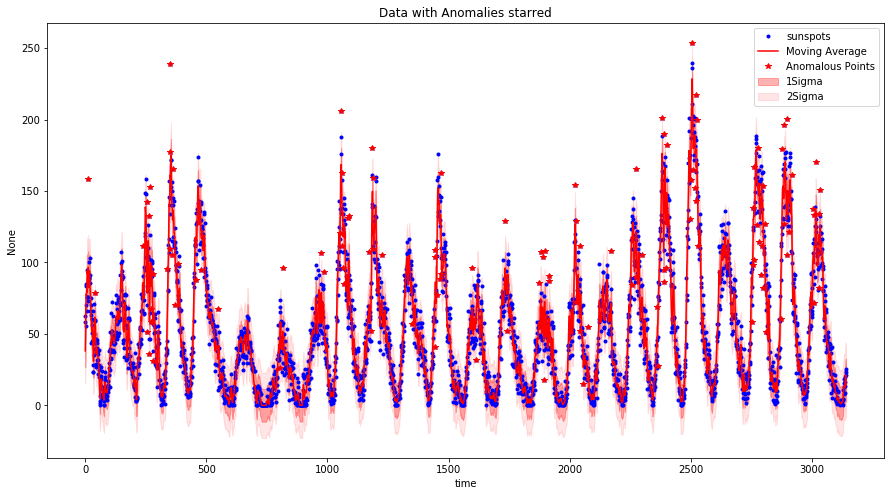

In [7]:
an.plot()

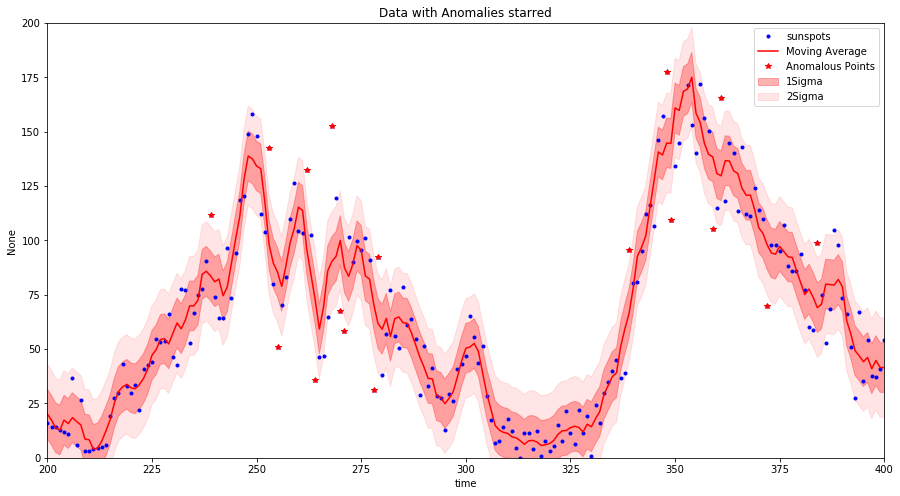

In [8]:
an.plot(left=200,right=400,top=200,bottom=0)

### Accessing data

In [9]:
# The graph values can be accessed using 'results'.
an.results.head()

,sunspots,mean_count,residual,pos_std,neg_std,pos_std_2,neg_std_2
time,,,,,,,
0,58.0,38.12,19.88,49.544234,26.695766,60.968468,15.271532
1,62.6,49.26,13.34,60.684234,37.835766,72.108468,26.411532
2,70.0,66.26,3.74,77.684234,54.835766,89.108468,43.411532
3,55.7,71.36,-15.66,82.784234,59.935766,94.208468,48.511532
4,85.0,77.80,7.20,89.224234,66.375766,100.648468,54.951532


In [10]:
# Anomalous data points can be printed from anoma_points.
an.anoma_points.head()

,sunspots
time,
10,158.6
42,78.4
239,111.8
253,142.5
255,51.0


### Check Normality of Residual

In order to use the ESD test, it is important that the quantity being tested is approximately normally distributed.  You can use the normality function in order to check this through two plots. 
In this implementation we calculate a residual value between the approximated curve (in this case the 5 day moving average) and the actual data:

<b>residual = (actual data point) -  (estimated value from moving average)</b>

The plots are simple and qualitative checks for normality:
- <b>Distribution of residuals</b> : is just a histogram of the residual in 100 bins.
- <b>Probability plot</b> : plots the actual data against it's corresponding normal value approximation (uses scipy.stats.probplot).  A perfectly normal data set would lie along the straight line.

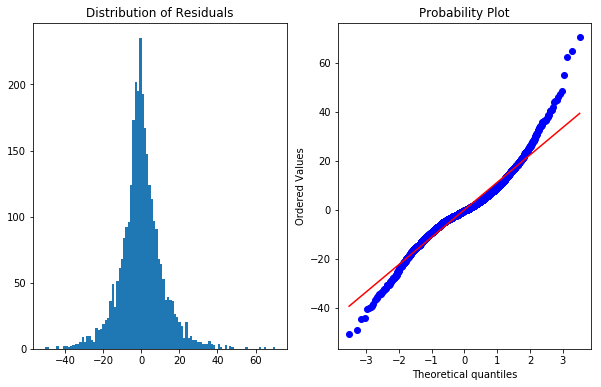

In [11]:
an.normality()